<center><font size=6> Divorce Prediction using artificial neural network </font></center>

In [1]:
import pandas as pd
df=pd.read_csv("Divorce.csv")
df.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


The dataset contains couples' responses to survey questions and whether each couple ended up divorcing or not. "1" in the "Class" clumn indicates divorced, while "0" indicates not divorced.

All variales are categorical and have been label-encoded, which saves us time, since we don't have to do the encoding here. 

There are 54 predictor variable the dataset, some of which are probably of little relevance or not relevant. We are going to run a feature selection algorithm to select the 15 most important features.

In [2]:
y=df[["Class"]]
X=df.drop(["Class"],axis=1)
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# feature extraction. We are going to output the selection scores for all features and select the features with the highest scores.
test = SelectKBest(score_func=mutual_info_classif, k="all")
fit = test.fit(X, y)
features = fit.transform(X)
# summarize scores
set_printoptions(precision=3)

# Sort the feature scores in ascending order.
scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores.sort_values(by=["scores"],ascending=False).nlargest(15,"scores")

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,scores
17,0.637518
19,0.623916
18,0.605479
16,0.603810
10,0.597868
39,0.584625
8,0.577510
15,0.576886
25,0.566601
28,0.563884


So, we got a 10 most important features. They are:

In [3]:
X.iloc[:,[17,19,18,16,10,39,8,15,25,28,24,29,38,14,11]].columns

Index(['Atr18', 'Atr20', 'Atr19', 'Atr17', 'Atr11', 'Atr40', 'Atr9', 'Atr16',
       'Atr26', 'Atr29', 'Atr25', 'Atr30', 'Atr39', 'Atr15', 'Atr12'],
      dtype='object')

What are those attributes? According to UCI's website: </br>

- Atr18: My spouse and I have similar ideas about how marriage should be
- Atr20: My spouse and I have similar values in trust.
- Atr19: My spouse and I have similar ideas about how roles should be in marriage.
- Atr11: I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other.
- Atr17: We share the same views about being happy in our life with my spouse.
- Atr40: We're just starting a discussion before I know what's going on.
- Atr9:  I enjoy traveling with my wife.
- Atr16: We're compatible with my spouse about what love should be.
- Atr26: I know my spouse's basic anxieties.
- Atr29: I know my spouse very well.
- Atr25: I have knowledge of my spouse's inner world.
- Atr30: I know my spouse's friends and their social relationships.
- Atr39: Our discussions often occur suddenly.
- Atr15: Our dreams with my spouse are similar and harmonious.
- Atr12: My spouse and I have similar values in terms of personal freedom.


We see that having similar value systems, trust and mutual respect are very important factors in a marriage. Even a computer algorithm knows that.

Let's form a predictor set based on those 15 attributes.

In [4]:
X=X.iloc[:,[17,19,18,16,10,39,8,15,25,28,24,29,38,14,11]]
X

,Atr18,Atr20,Atr19,Atr17,Atr11,Atr40,Atr9,Atr16,Atr26,Atr29,Atr25,Atr30,Atr39,Atr15,Atr12
0,0,1,0,0,1,3,0,1,0,0,0,1,3,0,0
1,4,2,3,4,4,4,4,4,1,1,2,1,2,4,3
2,3,2,3,3,3,3,1,3,2,3,2,2,3,3,4
3,3,4,3,3,4,4,3,3,1,1,2,3,4,3,3
4,1,1,2,1,0,1,0,1,2,1,0,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
166,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
167,0,1,0,0,0,2,0,1,1,0,1,1,1,0,1
168,0,0,0,0,0,1,0,0,0,0,0,0,4,0,1


One-hot encode the target variable.

In [5]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
y=pd.DataFrame(enc.fit_transform(y).toarray())
y

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
165,1.0,0.0
166,1.0,0.0
167,1.0,0.0
168,1.0,0.0


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
print(X_train.shape)
print(X_test.shape)

(144, 15)
(26, 15)


In [7]:
length=X_train.shape[1]
num_classes=y_test.shape[1]

import keras
from keras.models import Sequential
from keras.layers import Dense

# define classification model

def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(length, activation='relu', input_shape=(length,)))
    model.add(Dense(60,activation='relu'))
    model.add(Dense(60,activation="relu"))
    model.add(Dense(60,activation="relu"))
    model.add(Dense(60,activation="relu"))
    model.add(Dense(60,activation="tanh"))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Using TensorFlow backend.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/con

In [8]:
model=classification_model()
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20, verbose=2)
model.evaluate(X_test,y_test,verbose=0)

Train on 144 samples, validate on 26 samples
Epoch 1/20
 - 1s - loss: 0.4866 - acc: 0.6181 - val_loss: 0.3522 - val_acc: 0.6923
Epoch 2/20
 - 0s - loss: 0.3962 - acc: 0.7500 - val_loss: 0.2967 - val_acc: 0.8846
Epoch 3/20
 - 0s - loss: 0.3328 - acc: 0.9375 - val_loss: 0.2394 - val_acc: 1.0000
Epoch 4/20
 - 1s - loss: 0.2676 - acc: 0.9861 - val_loss: 0.1875 - val_acc: 1.0000
Epoch 5/20
 - 0s - loss: 0.2074 - acc: 0.9861 - val_loss: 0.1293 - val_acc: 1.0000
Epoch 6/20
 - 0s - loss: 0.1435 - acc: 0.9861 - val_loss: 0.0807 - val_acc: 1.0000
Epoch 7/20
 - 0s - loss: 0.0920 - acc: 0.9861 - val_loss: 0.0453 - val_acc: 1.0000
Epoch 8/20
 - 0s - loss: 0.0531 - acc: 0.9861 - val_loss: 0.0213 - val_acc: 1.0000
Epoch 9/20
 - 0s - loss: 0.0299 - acc: 0.9931 - val_loss: 0.0106 - val_acc: 1.0000
Epoch 10/20
 - 0s - loss: 0.0166 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 1.0000
Epoch 11/20
 - 0s - loss: 0.0082 - acc: 1.0000 - val_loss: 0.0023 - val_acc: 1.0000
Epoch 12/20
 - 0s - loss: 0.0041 - acc: 

[0.0002196156419813633, 1.0]

In [9]:
from sklearn.metrics import roc_auc_score
y_pred=model.predict(X_test)
roc_auc_score(y_test,y_pred)

1.0

100% accuracy and an AUC of 1 on test data. We crushed the divorce dataset. Let's analyze the selected attributes and see how they compare between couples that ended up divorcing and couples that remained together.

In [10]:
sub_df=df.iloc[:,[17,19,18,16,10,39,8,15,25,28,24,29,38,14,11]]
sub_df=pd.concat([sub_df,df[["Class"]]],axis=1)
sub_df

,Atr18,Atr20,Atr19,Atr17,Atr11,Atr40,Atr9,Atr16,Atr26,Atr29,Atr25,Atr30,Atr39,Atr15,Atr12,Class
0,0,1,0,0,1,3,0,1,0,0,0,1,3,0,0,1
1,4,2,3,4,4,4,4,4,1,1,2,1,2,4,3,1
2,3,2,3,3,3,3,1,3,2,3,2,2,3,3,4,1
3,3,4,3,3,4,4,3,3,1,1,2,3,4,3,3,1
4,1,1,2,1,0,1,0,1,2,1,0,1,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
166,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
167,0,1,0,0,0,2,0,1,1,0,1,1,1,0,1,0
168,0,0,0,0,0,1,0,0,0,0,0,0,4,0,1,0


In [16]:
df_1=sub_df[sub_df["Class"]==1]
df_1

,Atr18,Atr20,Atr40,Atr19,Atr11,Atr17,Atr9,Atr16,Atr29,Atr15,Atr39,Atr30,Atr26,Atr12,Atr25,Class
0,0,1,3,0,1,0,0,1,0,0,3,1,0,0,0,1
1,4,2,4,3,4,4,4,4,1,4,2,1,1,3,2,1
2,3,2,3,3,3,3,1,3,3,3,3,2,2,4,2,1
3,3,4,4,3,4,3,3,3,1,3,4,3,1,3,2,1
4,1,1,1,2,0,1,0,1,1,1,2,1,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,3,2,4,3,3,2,1,2,3,3,4,4,4,3,4,1
80,3,2,3,3,2,3,4,4,2,4,1,2,0,3,0,1
81,3,3,4,3,4,4,4,4,3,4,4,2,3,3,3,1
82,4,3,3,4,4,3,4,3,2,4,3,2,2,4,2,1


In [21]:
df_0=sub_df[sub_df["Class"]==0]
df_0

,Atr18,Atr20,Atr40,Atr19,Atr11,Atr17,Atr9,Atr16,Atr29,Atr15,Atr39,Atr30,Atr26,Atr12,Atr25,Class
84,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
86,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
87,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
88,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
166,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
167,0,1,2,0,0,0,0,1,0,0,1,1,1,1,1,0
168,0,0,1,0,0,0,0,0,0,0,4,0,0,1,0,0


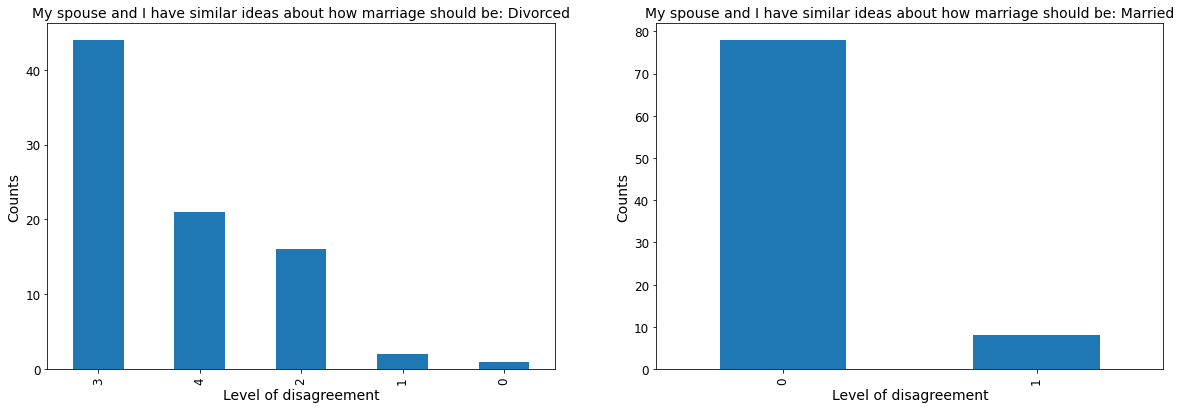

In [37]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2)

#ax = plt.subplots() 

ax0.tick_params(axis='both', which='major', labelsize=12) 
ax0.tick_params(axis='both', which='minor', labelsize=12)

ax1.tick_params(axis='both', which='major', labelsize=12) 
ax1.tick_params(axis='both', which='minor', labelsize=12)

# Subplot 1: Box plot
df_1["Atr18"].value_counts().plot(kind='bar', figsize=(20, 14), ax=ax0) # add to subplot 1
ax0.set_title('My spouse and I have similar ideas about how marriage should be: Divorced',fontsize=14)
ax0.set_xlabel('Level of disagreement',fontsize=14)
ax0.set_ylabel('Counts',fontsize=14)

# Subplot 2: Line plot
df_0["Atr18"].value_counts().plot(kind='bar', figsize=(20, 14), ax=ax1) 
ax1.set_title ('My spouse and I have similar ideas about how marriage should be: Married',fontsize=14)
ax1.set_xlabel('Level of disagreement',fontsize=14)
ax1.set_ylabel('Counts',fontsize=14)

plt.show()

It is unclear what the integer labels represent. But assuming that if they represent level of disagreement on the subject, we see a very stark contrast between divorced couples and married couples. On the subject of "My spouse and I have similar ideas about how marriage should be", almost all of the divorced couples disagreed. A majority of them even strongly disagreed. On the other hand, married couple agreed of the subject and only a small proportion slightly disagreedd.

Let's look at the second most important factor. 

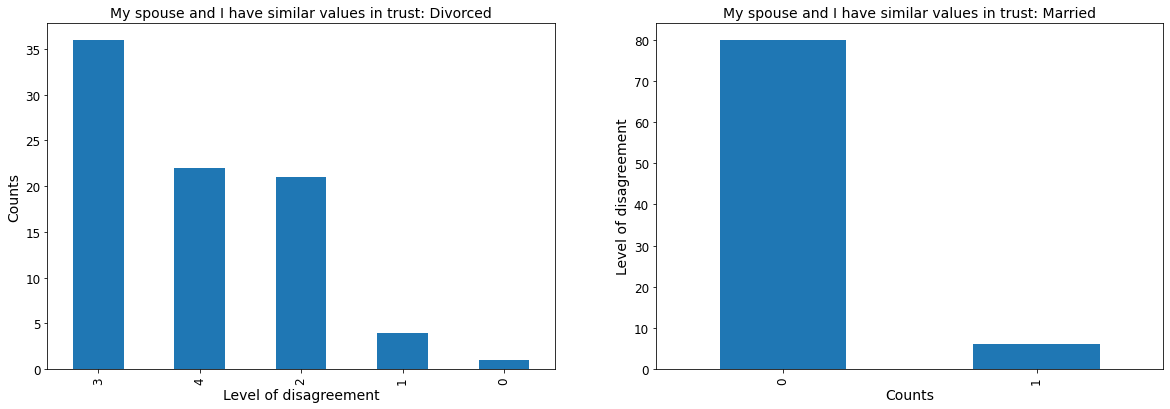

In [39]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2)

#ax = plt.subplots() 

ax0.tick_params(axis='both', which='major', labelsize=12) 
ax0.tick_params(axis='both', which='minor', labelsize=12)

ax1.tick_params(axis='both', which='major', labelsize=12) 
ax1.tick_params(axis='both', which='minor', labelsize=12)

# Subplot 1: Box plot
df_1["Atr20"].value_counts().plot(kind='bar', figsize=(20, 14), ax=ax0) # add to subplot 1
ax0.set_title('My spouse and I have similar values in trust: Divorced',fontsize=14)
ax0.set_xlabel('Level of disagreement',fontsize=14)
ax0.set_ylabel('Counts',fontsize=14)

# Subplot 2: Line plot
df_0["Atr20"].value_counts().plot(kind='bar', figsize=(20, 14), ax=ax1) 
ax1.set_title ('My spouse and I have similar values in trust: Married',fontsize=14)
ax1.set_ylabel('Level of disagreement',fontsize=14)
ax1.set_xlabel('Counts',fontsize=14)

plt.show()

On the subject "My spouse and I have similar values in trust", the situation on the second most important factor is almost the same: almost all divorced couples lacked trust in each other and a majority of them strongly disagreed on the subject. On the contrary, for married couple, almost all of them agree on the subject and only a small portion slightly disagreed.

The same analysis can be done for all the other attributes that were used to build the model. We are not going to go through all 15 here.